# Script for representative heatmaps from fluorescent intensity

In [ ]:
from PIL import Image, ImageOps, ImageEnhance, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import seaborn as sns

In [ ]:
#Chose colour map in https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

#Functions
def HEATMAP(image, merge, thresmin, thresmax, style):
    #Use mask for merge green and red
    if 'YesMerge' in merge:
        imageinput = cv2.bitwise_and(image[:,:,2], image[:,:,1])
        fig = plt.figure(figsize = (8,8))
        plot = plt.imshow(imageinput, cmap = style, vmin = thresmin, vmax = thresmax)
        fig.colorbar(plot)


    elif 'NoMerge' in merge:
        #Convert to gray scale and create the heatmap
        imageinput = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        fig = plt.figure(figsize = (8,8))
        plot = plt.imshow(imageinput, cmap = style, vmin = thresmin, vmax = thresmax)
        fig.colorbar(plot)

    return plot

def HEATMAPQUANT(image, merge, wid, hei, n, thresmin, thresmax, style, orientation, heatmap):
    if 'YesMerge' in merge:
        #Use mask for merge green and red
        imageinput = cv2.bitwise_and(image[:,:,2], image[:,:,1])

    elif 'NoMerge' in merge:
        #Convert to gray scale and create the heatmap
        imageinput = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    if 'v' in orientation:
        #Resize image
        resize = cv2.resize(imageinput, dsize = (wid,hei))
        section_size = resize.shape[0]/n

        #Make a copy to work with
        copy_image = resize.copy()

        #Create lst of limits
        cnt = 0
        lst_of_lim = []
        while cnt != copy_image.shape[0]:
            lst = []
            lst.append(int(cnt))
            cnt = cnt + section_size
            lst.append(int(cnt))
            lst_of_lim.append(tuple(lst))

        #Create lst of image sections
        lst_focus = []
        for h1,h2 in lst_of_lim:
            focus = copy_image[h1:h2,0:int(wid/10)]
            lst_focus.append(focus)

        #Get image means sections
        lst_mean_focus = []
        for f in lst_focus:
            sum_inten = 0
            for w in range(f.shape[1]):
                for h in range(f.shape[0]):
                    sum_inten = sum_inten + f[h,w]

            mean_inten = int(sum_inten/f.size)

            for w in range(f.shape[1]):
                for h in range(f.shape[0]):
                    f[h,w] = mean_inten

            lst_mean_focus.append(f)

        #New image for vectorization
        vec_image = cv2.resize(copy_image, dsize = (int(wid/10),hei))

        i = 0
        for mean in lst_mean_focus:
            vec_image[lst_of_lim[i][0]:lst_of_lim[i][1],0:int(wid/10)] = mean
            i = i + 1

        #Convert to RGB and resize image
        if 'image' in heatmap:
            fig = plt.figure(figsize = (10,10))
            imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            resizeRGB = cv2.resize(imageRGB, dsize = (wid,hei))

            fig1 = plt.figure(figsize = (8,8))
            plt.xlim(0, resize.shape[1] + vec_image.shape[1])
            plt.imshow(resizeRGB, cmap = style, vmin = thresmin, vmax = thresmax, extent = (vec_image.shape[1], vec_image.shape[1]+ resize.shape[1], resize.shape[0], 0))
            plot = plt.imshow(vec_image, cmap = style, vmin = thresmin, vmax = thresmax, extent = (0, vec_image.shape[1], resize.shape[0], 0))
            fig1.colorbar(plot)
        elif 'heatmap' in heatmap:
            fig = plt.figure(figsize = (10,10))
            resizeRGB = cv2.resize(imageinput, dsize = (wid,hei))

            fig1 = plt.figure(figsize = (8,8))
            plt.xlim(0, resize.shape[1] + vec_image.shape[1])
            plt.imshow(resizeRGB, cmap = style, vmin = thresmin, vmax = thresmax, extent = (vec_image.shape[1], vec_image.shape[1]+ resize.shape[1], resize.shape[0], 0))
            plot = plt.imshow(vec_image, cmap = style, vmin = thresmin, vmax = thresmax, extent = (0, vec_image.shape[1], resize.shape[0], 0))
            fig1.colorbar(plot)

    elif 'h' in orientation:
        #Resize image
        resize = cv2.resize(imageinput, dsize = (wid,hei))
        section_size = resize.shape[1]/n

        #Make a copy to work with
        copy_image = resize.copy()

        #Create lst of limits
        cnt = 0
        lst_of_lim = []
        while cnt != copy_image.shape[1]:
            lst = []
            lst.append(int(cnt))
            cnt = cnt + section_size
            lst.append(int(cnt))
            lst_of_lim.append(tuple(lst))

        print(lst_of_lim)
        #Create lst of image sections
        lst_focus = []
        for w1,w2 in lst_of_lim:
            focus = copy_image[0:int(hei/10),w1:w2]
            lst_focus.append(focus)

        #Get image means sections
        lst_mean_focus = []
        for f in lst_focus:
            sum_inten = 0
            for w in range(f.shape[1]):
                for h in range(f.shape[0]):
                    sum_inten = sum_inten + f[h,w]

            mean_inten = int(sum_inten/f.size)

            for w in range(f.shape[1]):
                for h in range(f.shape[0]):
                    f[h,w] = mean_inten
            lst_mean_focus.append(f)

        #New image for vectorization
        vec_image = cv2.resize(copy_image, dsize = (wid,int(hei/10)))

        i = 0
        for mean in lst_mean_focus:
            vec_image[0:int(hei/10),lst_of_lim[i][0]:lst_of_lim[i][1]] = mean
            i = i + 1

        #Convert to RGB and resize image
        if 'image' in heatmap:
            fig = plt.figure(figsize = (8,8))
            imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            resizeRGB = cv2.resize(imageRGB, dsize = (wid,hei))

            fig1 = plt.figure(figsize = (8,8))
            plt.ylim(0, resizeRGB.shape[0] + vec_image.shape[0])
            plt.imshow(resizeRGB, cmap = style, vmin = 0, vmax = thresmax, extent = (0, resizeRGB.shape[1], 0, resizeRGB.shape[0]))
            plot = plt.imshow(vec_image, cmap = style, vmin = thresmin, vmax = thresmax, extent = (0, resizeRGB.shape[1], resizeRGB.shape[0] + vec_image.shape[0], resizeRGB.shape[0]))
            fig1.colorbar(plot)
        if 'heatmap' in heatmap:
            fig = plt.figure(figsize = (8,8))
            resizeRGB = cv2.resize(imageinput, dsize = (wid,hei))

            fig1 = plt.figure(figsize = (8,8))
            plt.ylim(0, resizeRGB.shape[0] + vec_image.shape[0])
            plt.imshow(resizeRGB, cmap = style, vmin = 0, vmax = thresmax, extent = (0, resizeRGB.shape[1], 0, resizeRGB.shape[0]))
            plot = plt.imshow(vec_image, cmap = style, vmin = thresmin, vmax = thresmax, extent = (0, resizeRGB.shape[1], resizeRGB.shape[0] + vec_image.shape[0], resizeRGB.shape[0]))
            fig1.colorbar(plot)

    return plt.show()

# Working section

# Immunoreactivity analysis

In [ ]:
#Open and read image
file_name = 'Image_4783 mod.tif'
path = 'C:\\Users\\herdi\\Desktop\\Documentos\\Doctorado cs medicas\\Laboratorio\\Python protocolos\\imagenes\\mitotracker\\control\\{}'.format(file_name)
image = cv2.imread(path)

(1200, 1600, 3)

<Figure size 720x720 with 0 Axes>

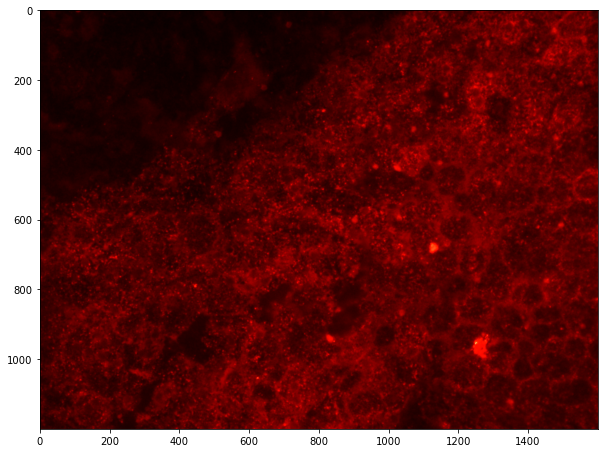

In [ ]:
#Show image in RGB
plt.figure(figsize = (10,10))
imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (10,10))
plt.imshow(imageRGB)
imageRGB.shape

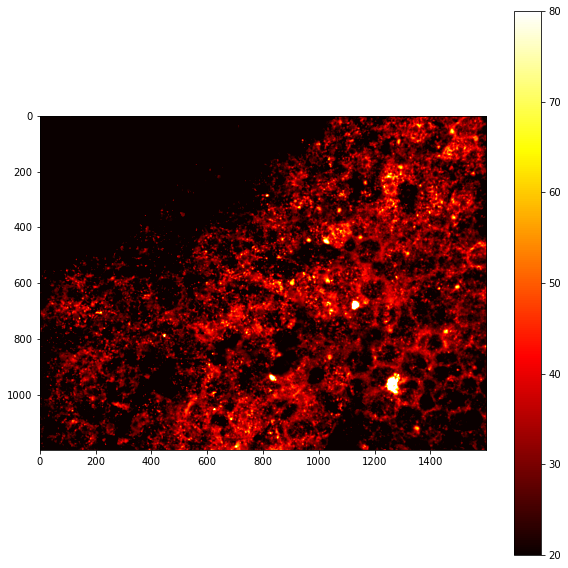

In [ ]:
HEATMAP(image,'NoMerge', 20, 80, 'hot')

<Figure size 720x720 with 0 Axes>

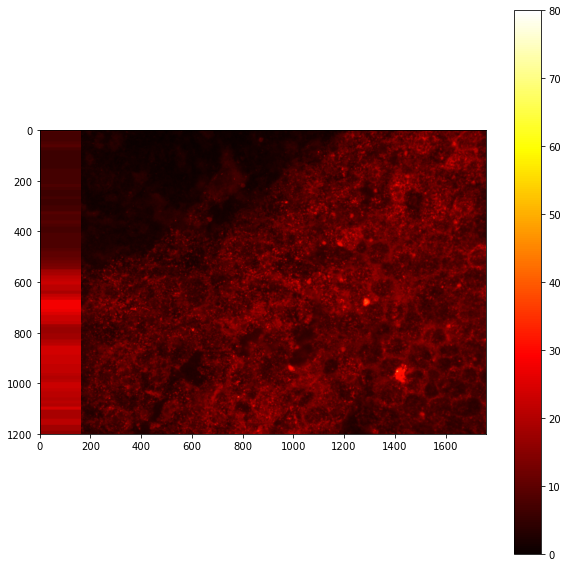

In [ ]:
HEATMAPQUANT(image, 'NoMerge', 1600, 1200, 100, 40, 80, 'hot', 'v')

# Co-immunoreactivity analysis

(768, 236, 3)


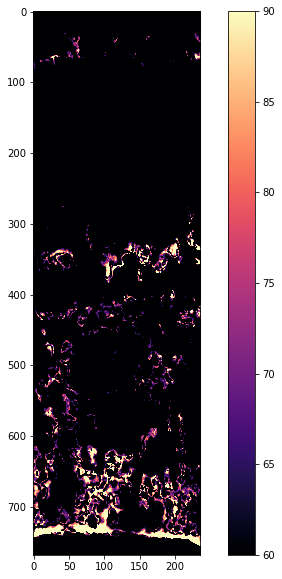

In [ ]:
file_name = 'RETINA SCG EE 3.tif'
path = 'C:\\Users\\herdi\\Desktop\\Documentos\\Doctorado cs medicas\\Laboratorio\\Python protocolos\\imagenes\\Coinmunos\\BDNF-GS\\fotos procesadas\\RETINA\\TEMPORAL\\{}'.format(file_name)
ret = cv2.imread(path)
print(ret.shape)

HEATMAP(ret,'YesMerge', 60, 90, 'magma')

<Figure size 720x720 with 0 Axes>

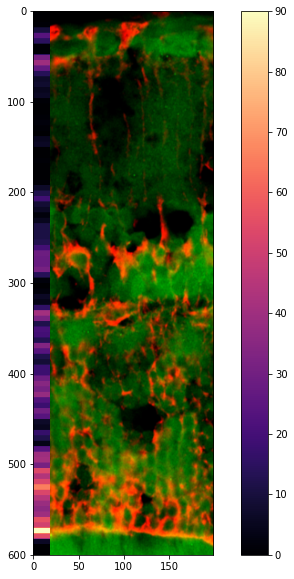

In [ ]:
HEATMAPQUANT(ret, 'YesMerge', 180, 600, 100, 60, 90, 'magma', 'v')